## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.timestamp = pd.to_datetime(df.timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.value_counts().count()

290584

d. The proportion of users converted.

In [6]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df[df.group == 'treatment'].landing_page.value_counts()['old_page'] \
+ df[df.group == 'control'].landing_page.value_counts()['new_page']

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null datetime64[ns]
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


In [10]:
df.duplicated().any()

False

`it seems that all values are correct, there is no null values, no duplication and all cells are filled-in`

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df2 = df

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

3893

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

In [13]:
df2.shape[0]

294478

In [14]:
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page'))]
df2.shape[0]

290585

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.value_counts().count()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [16]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [17]:
df2[df2.user_id == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
print(df2.shape[0])
df2 = df2.drop_duplicates(subset='user_id')
print(df2.shape[0])
df2[df2.user_id == 773192]

290585
290584


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2[df2.group == 'control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2[df2.group == 'treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [22]:
(df2.landing_page == 'new_page').mean()

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

### `it seems that the old page cannot be repalced with the new page.`

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} \leq p_{old}  \;\;\; \rightarrow \;\;\;  H_0: p_{new} - p_{old} \leq 0 $$
$$ H_1: p_{new} > p_{old} \;\;\;  \rightarrow  \;\;\; H_1: p_{new} - p_{old} > 0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [23]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


a. What is the **conversion rate** for $p_{new}$ under the null? 

In [24]:
p_new = df[(df.landing_page == 'new_page') & (df.group == 'treatment')]

In [25]:
# as per the assumtion of point 2, p_new.converted.mean() = p_old.converted.mean() = df.converted.mean()
df.converted.mean()

0.11965919355605512

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = df[(df.landing_page == 'old_page') & (df.group == 'control')]

In [27]:
# as per the assumtion of point 2, p_new.converted.mean() = p_old.converted.mean() = df.converted.mean()
df.converted.mean()

0.11965919355605512

c. What is $n_{new}$, the number of individuals in the treatment group?

In [28]:
p_new.shape[0]

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [29]:
p_old.shape[0]

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = p_new.converted.mean()
new_page_converted

0.11880724790277405

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = p_old.converted.mean()
old_page_converted

0.1203863045004612

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
obs_diff = new_page_converted - old_page_converted
obs_diff

-0.0015790565976871451

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

### Measuring Performance

In [33]:
# just define a function to calculate the performance 
time_prv_step = time_step = None
def performance(count,iterations):
    progress = round((count/iterations)*100) 
    print('processing {}%'.format(progress), end='\r')
    if(count%(iterations/10) == 0): 
        global time_prv_step
        global time_step
        
        time_prv_step = pd.Timestamp.now() if count == 0 else time_step
        time_step = pd.Timestamp.now()
        
        duration = (time_step - time_prv_step).total_seconds()
        print('{} samples, during {}s'.format(count, round(duration,2) ))
        time_start = time_step

In [34]:
# measuring performace when utilizing df[filteration]
diffs = []
iterations = 100 
for count in range(iterations):
    performance(count, iterations)
    sample = df.sample(df.shape[0], replace=True)
    mean_new = sample[(sample.landing_page == "new_page") & (sample.group == "treatment")]['converted'].mean()
    mean_old = sample[(sample.landing_page == "old_page") & (sample.group == "control")]['converted'].mean()
    diffs.append(mean_new - mean_old)
print('\ndone')

0 samples, during 0.0s
10 samples, during 1.87s
20 samples, during 1.73s
30 samples, during 1.85s
40 samples, during 2.14s
50 samples, during 2.06s
60 samples, during 1.95s
70 samples, during 1.74s
80 samples, during 1.73s
90 samples, during 1.84s
processing 99%
done


In [35]:
# measuring performace when utilizing df.query(filteration)
diffs = []
iterations = 100 
for count in range(iterations):
    performance(count, iterations)
    sample = df.sample(df.shape[0], replace=True)
    mean_new = sample.query('landing_page == "new_page" and group == "treatment"')['converted'].mean()
    mean_old = sample.query('landing_page == "old_page" and group == "control"')['converted'].mean()
    diffs.append(mean_new - mean_old)
print('\ndone')

0 samples, during 0.0s
10 samples, during 1.42s
20 samples, during 1.43s
30 samples, during 1.35s
40 samples, during 1.48s
50 samples, during 1.51s
60 samples, during 1.32s
70 samples, during 1.29s
80 samples, during 1.35s
90 samples, during 1.35s
processing 99%
done


### Observation outcome

> <span style="font-size:large;">`df.query(filtration)` is better that `df[filtration]` in the performance.</span>


In [36]:
p_diffs = []
df2 = df[['landing_page', 'group', 'converted']] # just to increase the performance by removing unneeded data
iterations = 10000 
for count in range(iterations):
    performance(count, iterations)
    sample = df2.sample(df2.shape[0], replace=True)
    mean_new = sample.query('landing_page == "new_page" and group == "treatment"')['converted'].mean()
    mean_old = sample.query('landing_page == "old_page" and group == "control"')['converted'].mean()
    p_diffs.append(mean_new - mean_old)
print('\ndone')

0 samples, during 0.0s
1000 samples, during 95.63s
2000 samples, during 88.22s
3000 samples, during 80.43s
4000 samples, during 81.7s
5000 samples, during 83.66s
6000 samples, during 82.79s
7000 samples, during 83.59s
8000 samples, during 79.28s
9000 samples, during 77.54s
processing 100%
done


In [37]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   4.,   37.,  287., 1030., 2229., 3018., 2170.,  951.,  239.,
          35.]),
 array([-0.00662571, -0.00570275, -0.00477979, -0.00385683, -0.00293387,
        -0.00201091, -0.00108795, -0.00016499,  0.00075797,  0.00168093,
         0.0026039 ]),
 <a list of 10 Patch objects>)

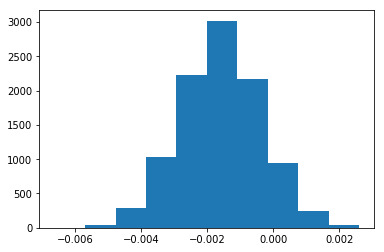

In [38]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [39]:
# just for ploting
error1_rate = 5
# error1_L = error1_rate/2
# error1_R = 100 - (error1_rate/2)
error1_R = 100 - (error1_rate)

In [40]:
# # just for ploting
# kwargs = dict(histtype='stepfilled', bins=10, color=['C1','C0','C1'])

# p_diffs_L = p_diffs[p_diffs < np.percentile(p_diffs, error1_L)]
# p_diffs_C = p_diffs[p_diffs >= np.percentile(p_diffs, error1_L)]
# p_diffs_C = p_diffs_C[p_diffs_C <= np.percentile(p_diffs, error1_R)]
# p_diffs_R = p_diffs[p_diffs > np.percentile(p_diffs, error1_R)]

# plt.hist([p_diffs_L, p_diffs_C, p_diffs_R], **kwargs)
# plt.axvline(obs_diff + p_diffs.mean(), c="r")

In [41]:
# just for ploting
kwargs = dict(histtype='stepfilled', bins=12, color=['C0','C1'])

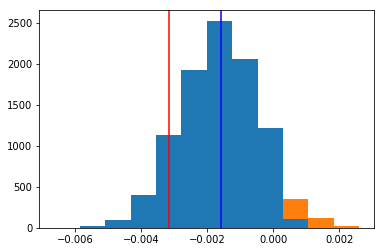

In [42]:
p_diffs_L = p_diffs[p_diffs <= np.percentile(p_diffs, error1_R)]
p_diffs_R = p_diffs[p_diffs > np.percentile(p_diffs, error1_R)]

plt.hist([p_diffs_L, p_diffs_R], **kwargs)
plt.axvline(obs_diff + p_diffs.mean(), c='r')
plt.axvline(p_diffs.mean(), c='b')

### Normalizing

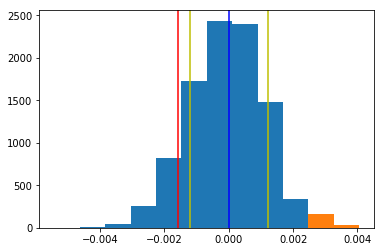

In [43]:
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.shape[0])

null_val_L = null_vals[null_vals <= np.percentile(null_vals, error1_R)]
null_val_R = null_vals[null_vals > np.percentile(null_vals, error1_R)]

plt.hist([null_val_L, null_val_R], **kwargs)
plt.axvline(obs_diff, c='r')
plt.axvline(0, c='b')
plt.axvline(null_vals.std(), c='y')
plt.axvline(-null_vals.std(), c='y')


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In [44]:
(null_vals > obs_diff).mean()

0.903


> Because **p-value** is $90.59\%$ which is greater than the error I rate $(\alpha = 5\%)$, so, there is no evidence to **reject** the **null hypothesis** and choose the alternative.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = p_old.converted.sum()
convert_new = p_new.converted.sum()
n_old = p_old.shape[0]
n_new = p_new.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
z_score, p_score = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score)
print(p_score)

-1.3116075339133115
0.905173705140591


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

> **z score** is a measure of how many standard deviations $(\sigma)$ below or above the population mean $(\mu)$. While **z score** is negative $(-)$, means, it is less than $\mu$ by ~1.312 times of $\sigma$.

> **p score** is p-value. So, the answer is **YES** they agree with finding in part __j__ and **k**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

> Logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [146]:
df2 = df
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [147]:
import statsmodels.api as sm

lm = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Sat, 08 Jun 2019   Pseudo R-squ.:               7.093e-06
Time:                        13:13:58   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
                                        LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9887      0.008   -248.297      0.000      -2.004      -1.973
ab_page       -0.0140      0.011     -1.237      0.216      -0.036       0.008
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [148]:
np.exp(result.params)

intercept    0.136879
ab_page      0.986052
dtype: float64

In [149]:
1/_

intercept    7.305704
ab_page      1.014145
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?


> The **p-value** is $21.6\%$ which is greater than the error I rate $(\alpha = 5\%)$, so, there is no evidence to **reject** the **null hypothesis** and choose the alternative.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

> Location, gender and age categories might influence on convertes. However, we have to be careful for multicollinearity.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [150]:
df3 = pd.read_csv('countries.csv')
df3.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [151]:
df2 = df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == True]

In [152]:
df4 = df2.set_index('user_id').join(df3.set_index('user_id'), how='inner')
df4.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [153]:
df4 = df4.join(pd.get_dummies(df4['country']))
df4.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [155]:
lm = sm.Logit(df4['converted'], df4[['intercept', 'UK', 'US', 'ab_page']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            3
Date:                Sat, 08 Jun 2019   Pseudo R-squ.:               2.326e-05
Time:                        13:17:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.248      0.000      -2.082      -1.978
UK             0.0506      0.028      1.784      0.075      -0.005       0.106
US             0.0407      0.027      1.515      0.130      -0.012       0.093
ab_page       -0.0150      0.011     -1.309      0.191      -0.037       0.007
==============================================================================
"""

In [164]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = '+'.join(df4.columns.drop(['converted', 'timestamp', 'group', 'landing_page', 'country', 'CA', 'intercept']))
y, X = dmatrices('converted ~'+cols, df4, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,40.370520,Intercept
1,20.042876,ab_page
2,9.052902,UK
3,9.065163,US
4,10.469112,page_UK
5,19.555411,page_US


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [165]:
df4['page_UK'] = df4['ab_page'] * df4['UK']
df4['page_US'] = df4['ab_page'] * df4['US']
df4.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,page_UK,page_US
user_id,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1,0,1


In [166]:
lm = sm.Logit(df4['converted'], df4[['intercept', 'UK', 'US', 'ab_page', 'page_UK', 'page_US']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366106
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290587
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Jun 2019   Pseudo R-squ.:               3.485e-05
Time:                        13:34:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1915
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
page_UK        0.0783      0.057      1.378      0.168      -0.033       0.190
page_US        0.0469      0.054      0.871      0.384      -0.059       0.152
==============================================================================
"""

In [168]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0